In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
data = pd.read_csv('StudentsPerformance.csv')
data

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B                 high school      standard   
13     male        group A                some college      standard   
14   female        group A             master's degree      standard   
15   female        group C            some high school      standard   
16     male        group C                 high school      standard   
17   female        group B            some high school  free/reduced   
18     male        group C             master's degree  free/reduced   
19   female        group C          associate's degree  free/reduced   
20     male        group D                 high school      standard   
21   female        group B                some college  free/reduced   
22     male        group D                some college      standard   
23   female        group C            some high school      standard   
24     male        group D           bachelor's degree  free/reduced   
25     male        group A             master's degree  free/reduced   
26     male        group B                some college      standard   
27   female        group C           bachelor's degree      standard   
28     male        group C                 high school      standard   
29   female        group D             master's degree      standard   
..      ...            ...                         ...           ...   
970  female        group D           bachelor's degree      standard   
971    male        group C            some high school      standard   
972  female        group A                 high school  free/reduced   
973  female        group D                some college  free/reduced   
974  female        group A                some college      standard   
975  female        group C                some college      standard   
976    male        group B                some college  free/reduced   
977    male        group C          associate's degree      standard   
978    male        group D                 high school      standard   
979  female        group C          associate's degree      standard   
980  female        group B                 high school  free/reduced   
981    male        group D            some high school      standard   
982    male        group B            some high school      standard   
983  female        group A                some college      standard   
984  female        group C            some high school      standard   
985    male        group A                 high school      standard   
986  female        group C          associate's degree      standard   
987    male        group E            some high school      standard   
988  female        group A            some high school  free/reduced   
989  female        group D                some college  free/reduced   
990    male        group E                 high school  free/reduced   
991  female        group B            some high school      standard   
992  female        group D          associate's degree  free/reduced   
993  female        group D           bachelor

In [20]:
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [48]:
gender = data.groupby('gender')
race = data.groupby('race/ethnicity')
parents_education = data.groupby('parental level of education')
test_prep = data.groupby('test preparation course')

In [90]:
gender_score = gender.aggregate(np.mean)
gender_score

math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203

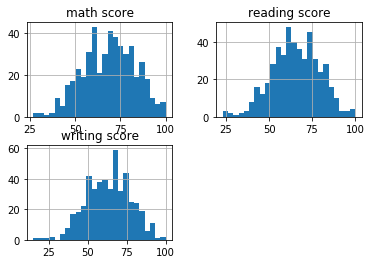

In [87]:
gender.hist(bins=25)
plt.title('Scores By Gender')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

female    518
male      482
Name: gender, dtype: int64

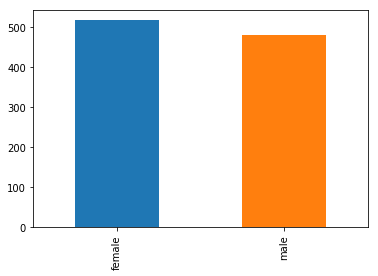

In [98]:
data.gender.value_counts().plot(kind='bar')
data.gender.value_counts()

In [128]:
parents=data['parental level of education'].value_counts()
parents

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

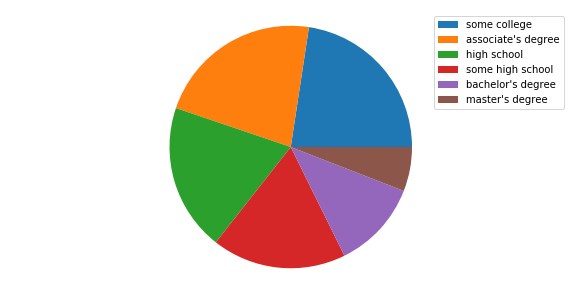

In [129]:
plt.figure(figsize=(10,5))
plt.pie(parents)
plt.axis('equal')
plt.legend(parents.index)

In [150]:
gender=data[['gender','math score','reading score','writing score']]
gender.head()

gender  math score  reading score  writing score
0  female          72             72             74
1  female          69             90             88
2  female          90             95             93
3    male          47             57             44
4    male          76             78             75

In [174]:
prep = data[['test preparation course', 'math score']]
prep.head()

test preparation course  math score
0                    none          72
1               completed          69
2                    none          90
3                    none          47
4                    none          76

In [164]:
race_means = race.aggregate(np.mean)
race_means

math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143

In [190]:
prep_score = test_prep.aggregate(np.mean)
prep_score

math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673

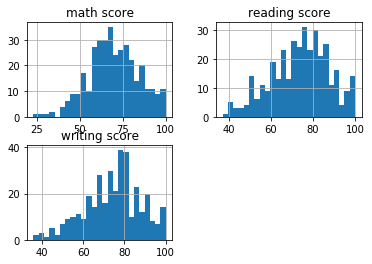

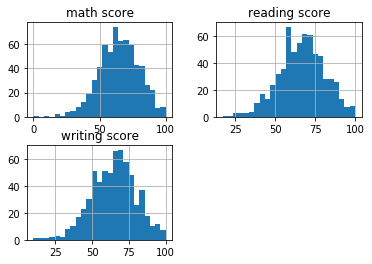

In [193]:
test_prep.hist(bins=25)
plt.title('Scores By Preparedness')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

In [187]:
education_score = parents_education.aggregate(np.mean)
education_score
#can we put this in a quantile/box plot for each level of education?

math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268

In [183]:
education_score.hist(bins=25)
plt.title('Scores By Parent\'s Education Level')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

In [191]:
race.describe()

math score                                                 \
                    count       mean        std   min    25%   50%   75%   
race/ethnicity                                                             
group A              89.0  61.629213  14.523008  28.0  51.00  61.0  71.0   
group B             190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   
group C             319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   
group D             262.0  67.362595  13.769386  26.0  59.00  69.0  77.0   
group E             140.0  73.821429  15.534259  30.0  64.75  74.5  85.0   

                      reading score             ...                  \
                  max         count       mean  ...      75%    max   
race/ethnicity                                  ...                   
group A         100.0          89.0  64.674157  ...    74.00  100.0   
group B          97.0         190.0  67.352632  ...    79.75   97.0   
group C          98.0         319.0  69.103448  ...    78.50  100.0   
group D         100.0         262.0  70.030534  ...    79.00  100.0   
group E         100.0         140.0  73.028571  ...    84.00  100.0   

               writing score                                                  \
                       count       mean        std   min    25%   50%    75%   
race/ethnicity                                                                 
group A                 89.0  62.674157  15.468278  19.0  51.00  62.0  73.00   
group B                190.0  65.600000  15.625173  15.0  55.25  67.0  78.00   
group C                319.0  67.827586  14.983378  10.0  57.00  68.0  79.00   
group D                262.0  70.145038  14.367707  32.0  61.00  72.0  80.00   
group E                140.0  71.407143  15.113906  22.0  62.00  72.0  80.25   

                       
                  max  
race/ethnicity         
group A          97.0  
group B          96.0  
group C         100.0  
group D         100.0  
group E         100.0  

[5 rows x 24 columns]

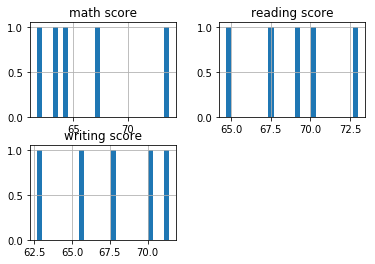

In [189]:
race_score.hist(bins=25)
plt.title('Scores By Race')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()